<a href="https://colab.research.google.com/github/bharathiv38/Bharathi/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')
plt.rcParams["figure.figsize"] = (10,8)

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("/content/telecom-churn_dummies.csv")

In [3]:
df.drop(labels = "Unnamed: 0", axis=1, inplace=True)

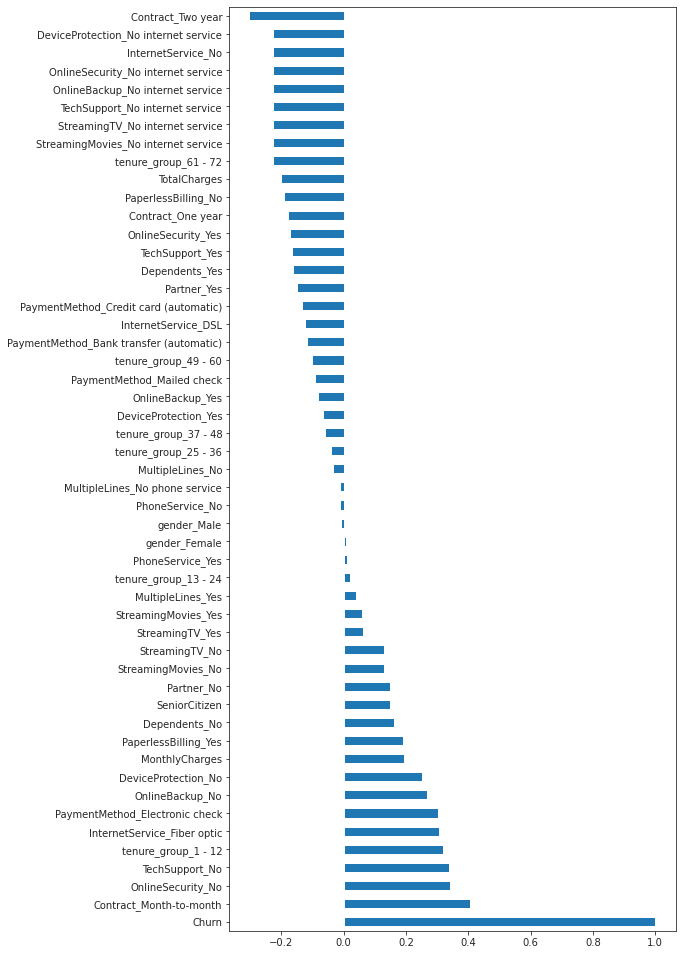

In [4]:
plt.figure(figsize=(8,17))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='barh')

# New Section

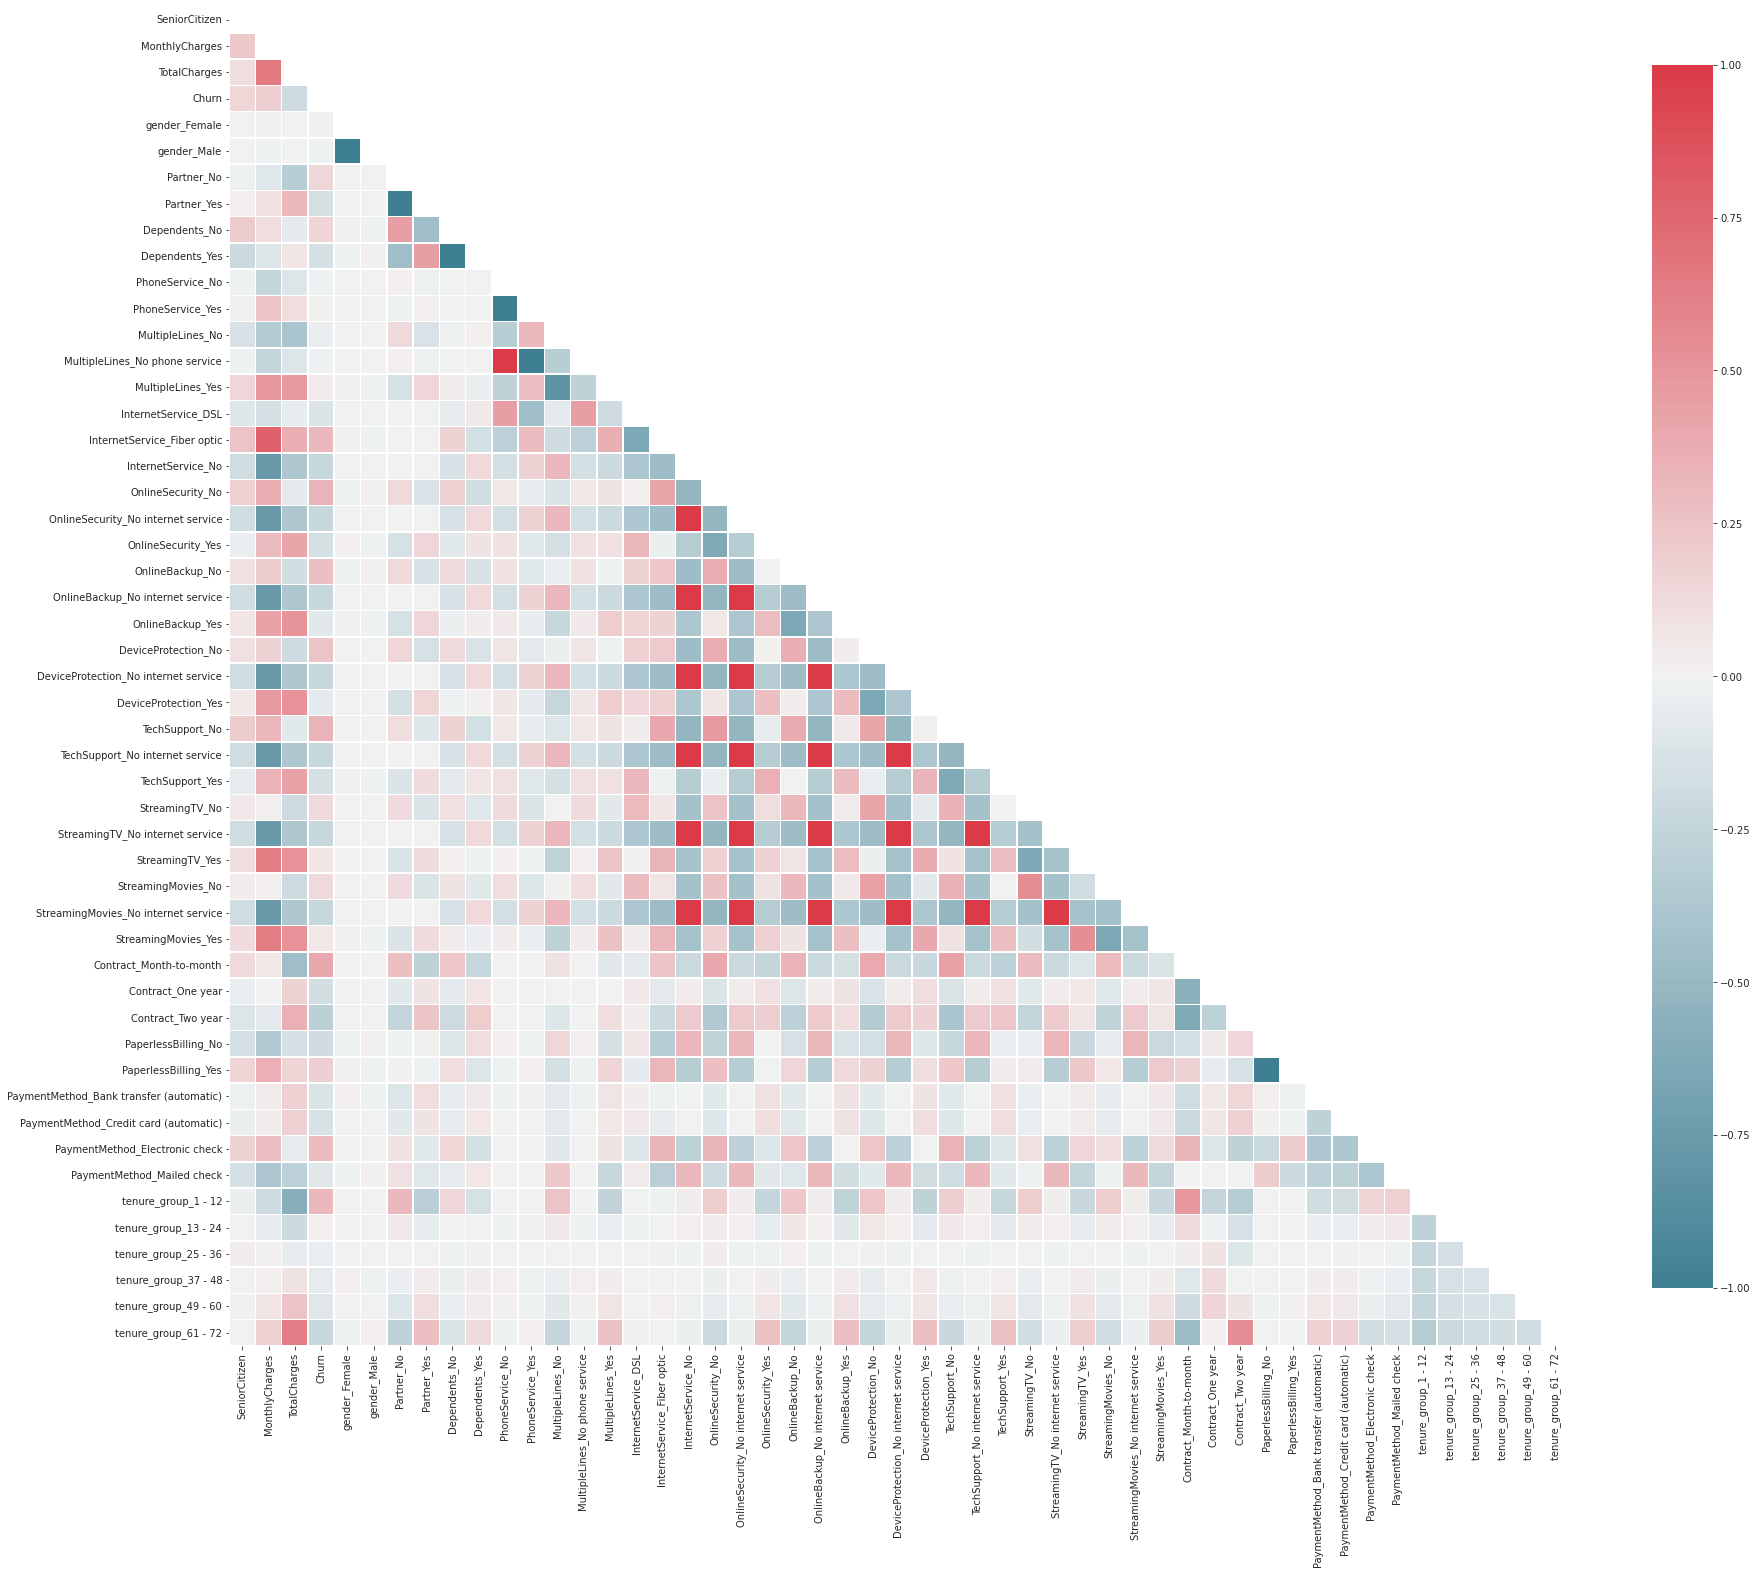

In [5]:
# resize the figure size
plt.figure(figsize=(30,30))

# calculate the correlations
correlations = df.corr()

# create mask show no duplicate
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

# color
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlations, 
            cmap = cmap, 
            vmax = 1.0, 
            mask = mask, # no duplicate
            square = True, 
            linewidths = 0.5, 
            # annot = True, # data
            cbar_kws = {"shrink": .75}) # bar size
    
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
data = df.copy()

In [8]:
MMs = MinMaxScaler()
data["MonthlyCharges"] = MMs.fit_transform(data[["MonthlyCharges"]])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = data.drop(['Churn'], axis=1)
y = data["Churn"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=data["Churn"])

In [12]:
from imblearn.combine import SMOTEENN

In [14]:
from imblearn.over_sampling import SMOTE

In [17]:
sm = SMOTE()
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

**Model Building - Random Forest** 

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import *

In [21]:
base_rf = RandomForestClassifier(n_estimators=200,random_state=100)
base_rf.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(n_estimators=200, random_state=100)

In [22]:
y_pred = base_rf.predict(X_test)

In [23]:
print(f"Model base score :{base_rf.score(X_test,y_test):.4}\n")
print(f"Model base ROC_AUC_score: {roc_auc_score(y_test,y_pred):.4}\n")
print(classification_report(y_test,y_pred,labels=[0,1]))

Model base score :0.7669

Model base ROC_AUC_score: 0.6826

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1033
           1       0.57      0.50      0.53       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



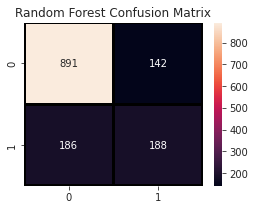

In [25]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',linecolor='k',linewidths=2)
plt.title("Random Forest Confusion Matrix")
plt.show()

**Select Features - Random Forest Classifier**

In [27]:
feature_select = RandomForestClassifier()
feature_select = feature_select.fit(X_train_resampled,y_train_resampled)
importances = feature_select.feature_importances_

feature_importance = zip(X_train.columns,importances)
feature_importance_df = pd.DataFrame(feature_importance,columns=['Features','Importance'])
feature_importance_df.sort_values(by='Importance',inplace=True,ascending =False)

In [28]:
feature_importance_df.head(15)

,Features,Importance
2,TotalCharges,0.127105
1,MonthlyCharges,0.094019
19,OnlineSecurity_Yes,0.049937
37,Contract_Two year,0.049650
28,TechSupport_Yes,0.048491
35,Contract_Month-to-month,0.040857
36,Contract_One year,0.037669
38,PaperlessBilling_No,0.028606
14,InternetService_DSL,0.026265
6,Partner_Yes,0.023208


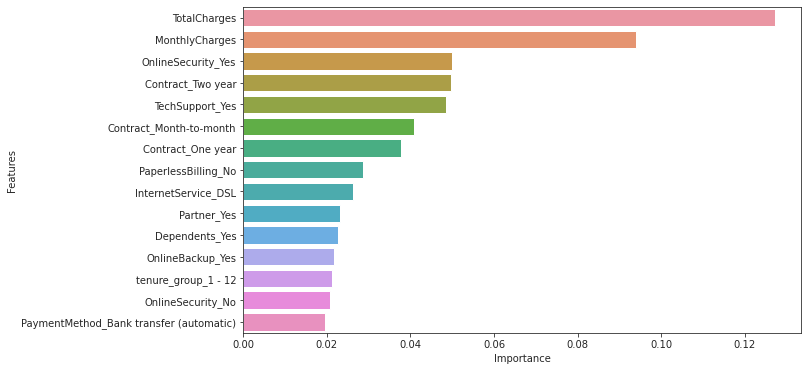

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance_df.head(15),x='Importance',y='Features')

In [30]:
def get_feature_list(n):
  l =[]
  for x in feature_importance_df.head(n).Features:
    l.append(x)

  return l

Select 5 features

In [31]:
select_feature_5 = get_feature_list(5)

In [33]:
X_select5 = data[select_feature_5]
Y = data['Churn']

In [35]:
X_train_select5,X_test_select5,y_train,y_test = train_test_split(X_select5,y,test_size=0.2,random_state=42,stratify = data['Churn'])

In [37]:
X_train_select5_resampled,y_train_resampled = sm.fit_resample(X_train_select5,y_train)

In [38]:
rf_select2 = RandomForestClassifier(n_estimators= 200,criterion='gini',random_state=100)
base_rf.fit(X_train_select5_resampled,y_train_resampled)

RandomForestClassifier(n_estimators=200, random_state=100)

In [39]:
y_pred_select5 = base_rf.predict(X_test_select5)

In [42]:
print(classification_report(y_test,y_pred_select5))
print("\nScore of test data:")
print(f"Mean Accuracy: {base_rf.score(X_test_select5,y_test):.4}")
print(f"F1 Score : {f1_score(y_test,y_pred_select5):.4}")
print(f"Precision Score:{precision_score(y_test,y_pred_select5):.4}")
print(f"Recall Score: {recall_score(y_test,y_pred_select5):.4}")

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1033
           1       0.50      0.63      0.56       374

    accuracy                           0.74      1407
   macro avg       0.68      0.70      0.69      1407
weighted avg       0.76      0.74      0.75      1407


Score of test data:
Mean Accuracy: 0.737
F1 Score : 0.5616
Precision Score:0.5043
Recall Score: 0.6337


Select 10 features

In [43]:
select_feature_10 = get_feature_list(10)

In [44]:
X_select10 = data[select_feature_10]
y=data['Churn']

In [45]:
X_train_select10,X_test_select10,y_train,y_test=train_test_split(X_select10,y,test_size=0.2,random_state=42,stratify=data['Churn'] )

In [46]:
X_train_select10_resampled,y_train_resampled=sm.fit_resample(X_train_select10,y_train)

In [47]:
rf_select10 = RandomForestClassifier(n_estimators=200,random_state=100)
base_rf.fit(X_train_select10_resampled,y_train_resampled)

RandomForestClassifier(n_estimators=200, random_state=100)

In [48]:
y_pred_select10 = base_rf.predict(X_test_select10)

In [49]:
print(classification_report(y_test, y_pred_select10))
print("\nScore of test data:")
print(f" Mean Accuracy   :{base_rf.score(X_test_select10, y_test):.4}")
print(f" F1 score        :{f1_score(y_test, y_pred_select10):.4}")
print(f" Precision score :{precision_score(y_test, y_pred_select10):.4}") # label 1 score in classification report
print(f"*Recall score*   :{recall_score(y_test, y_pred_select10):.4}") # label 1 score in classification report

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1033
           1       0.55      0.60      0.57       374

    accuracy                           0.76      1407
   macro avg       0.70      0.71      0.70      1407
weighted avg       0.77      0.76      0.76      1407


Score of test data:
 Mean Accuracy   :0.7612
 F1 score        :0.5714
 Precision score :0.5463
*Recall score*   :0.5989


**Hyperparameters Tuning**

In [50]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid = {"n_estimators": [100,150,200,250,350],
              "max_depth": [1,2], # max_leaf_nodes
              # "max_leaf_nodes": 
              "min_samples_leaf": [5,10,15], 
              "bootstrap": [True, False]}


grid_search_forest = GridSearchCV(base_rf, 
                                  param_grid, 
                                  cv = 3, 
                                  scoring = "recall",
                                  n_jobs=-1,
                                  verbose=3)

grid_search_forest.fit(X_train_select10_resampled, y_train_resampled)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=200,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [1, 2],
                         'min_samples_leaf': [5, 10, 15],
                         'n_estimators': [100, 150, 200, 250, 350]},
             scoring='recall', verbose=3)

In [53]:
print(grid_search_forest.best_estimator_)
print(f"\nThe trained recall score: {grid_search_forest.best_score_:.4f}\n")

RandomForestClassifier(bootstrap=False, max_depth=1, min_samples_leaf=5,
                       random_state=100)

The trained recall score: 0.8332



In [57]:
# since it is test data set
best_model = grid_search_forest.best_estimator_
y_pred = best_model.predict(X_test_select10)

print(classification_report(y_test, y_pred))
print("\nScore of test data:")
print(f" Mean Accuracy   :{base_rf.score(X_test_select10, y_test):.4}")
print(f" F1 score        :{f1_score(y_test, y_pred):.4}")
print(f" Precision score :{precision_score(y_test, y_pred):.4}") # label 1 score in classification report
print(f"*Recall score*   :{recall_score(y_test, y_pred):.4}") # label 1 score in classification report

              precision    recall  f1-score   support

           0       0.92      0.58      0.71      1033
           1       0.42      0.86      0.57       374

    accuracy                           0.65      1407
   macro avg       0.67      0.72      0.64      1407
weighted avg       0.79      0.65      0.67      1407


Score of test data:
 Mean Accuracy   :0.7612
 F1 score        :0.5669
 Precision score :0.4238
*Recall score*   :0.8556


In [58]:
param_grid_2 = {"n_estimators": [200,225,250,300,325,350],
              "max_depth": [1,2], # max_leaf_nodes
              "min_samples_leaf": [3,5,7], #
              "bootstrap": [True, False]}


grid_search_forest_2 = GridSearchCV(base_rf, 
                                  param_grid_2, 
                                  cv = 3, 
                                  scoring = "recall",
                                  n_jobs=-1,
                                  verbose=3)

grid_search_forest_2.fit(X_train_select10_resampled, y_train_resampled)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=200,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [1, 2],
                         'min_samples_leaf': [3, 5, 7],
                         'n_estimators': [200, 225, 250, 300, 325, 350]},
             scoring='recall', verbose=3)

In [60]:
print(grid_search_forest_2.best_estimator_)
print(f"\nThe trained recall score: {grid_search_forest_2.best_score_:.4f}\n")

RandomForestClassifier(max_depth=1, min_samples_leaf=3, n_estimators=300,
                       random_state=100)

The trained recall score: 0.8312



In [61]:
# since it is test data set
best_model = grid_search_forest_2.best_estimator_
y_pred = best_model.predict(X_test_select10)

print(classification_report(y_test, y_pred))
print("\nScore of test data:")
print(f" Mean Accuracy   :{base_rf.score(X_test_select10, y_test):.4}")
print(f" F1 score        :{f1_score(y_test, y_pred):.4}")
print(f" Precision score :{precision_score(y_test, y_pred):.4}") # label 1 score in classification report
print(f"*Recall score*   :{recall_score(y_test, y_pred):.4}") # label 1 score in classification report

              precision    recall  f1-score   support

           0       0.92      0.58      0.71      1033
           1       0.42      0.86      0.57       374

    accuracy                           0.65      1407
   macro avg       0.67      0.72      0.64      1407
weighted avg       0.79      0.65      0.67      1407


Score of test data:
 Mean Accuracy   :0.7612
 F1 score        :0.5669
 Precision score :0.4238
*Recall score*   :0.8556


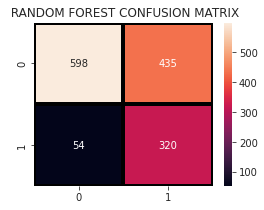

In [62]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX")
plt.show()

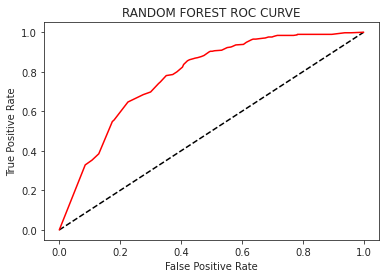

In [63]:
y_pred_prob = best_model.predict_proba(X_test_select10)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='RANDOM FOREST',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RANDOM FOREST ROC CURVE')
plt.show();

**Model Building - AdaBoostClassifier　(ON-GOING)**

In [64]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
adamodel = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
adamodel.fit(X_train_select10_resampled, y_train_resampled)
y_pred_ada = adamodel.predict(X_test_select10)

In [65]:
print(classification_report(y_test, y_pred_ada))
print("\nScore of test data:")
print(f" Mean Accuracy   :{base_rf.score(X_test_select10, y_test):.4}")
print(f" F1 score        :{f1_score(y_test, y_pred_ada):.4}")
print(f" Precision score :{precision_score(y_test, y_pred_ada):.4}") # label 1 score in classification report
print(f"*Recall score*   :{recall_score(y_test, y_pred_ada):.4}") # label 1 score in classification report

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1033
           1       0.51      0.77      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.76      1407


Score of test data:
 Mean Accuracy   :0.7612
 F1 score        :0.6139
 Precision score :0.5116
*Recall score*   :0.7674


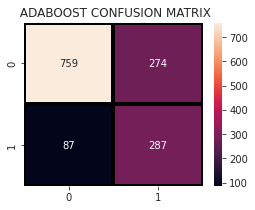

In [66]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_ada),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" ADABOOST CONFUSION MATRIX")
plt.show()